In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json
/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_66Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_AllAgree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/README.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/License.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_75Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/Sentences_50Agree.txt
/kaggle/input/indian-financial-news-articles-20032020/IndianFinancialNews.csv
/kaggle/input/nnlm/tensorflow2/en-dim128-with-normalization/1/saved_model.pb
/kaggle/input/nnlm/tensorflow2/en-dim128-with-normalization/1/assets/tokens.txt
/kaggle/input/nnlm/tensorflow2/en-dim128-with-normalization/1/variables/variables.index
/k

In [2]:
!pip install spacy
!pip install nltk
!pip install gensim
!pip install seaborn
!python -m spacy download en_core_web_sm
!pip install wordcloud

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv', encoding = 'cp1252', names = ['Sentiment', 'News'])
df = df[['News', 'Sentiment']]
sentiment_mapping = {
    'positive': 1,
    'negative': -1,
    'neutral': 0
}

df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

In [5]:
import string
import re
def del_punc(text):
    new_text=re.sub('['+string.punctuation+']', '', text)
    return new_text
df['Tokens']=df['News'].apply(lambda x: del_punc(x))

from nltk import word_tokenize

df['Tokens']=[word_tokenize(sen) for sen in df.Tokens]

def to_lower(txt):
    return [t.lower() for t in txt]
df['Tokens']=[to_lower(txt) for txt in df.Tokens]
from nltk.corpus import stopwords

stopword_list=stopwords.words('english')
print(stopword_list)

def del_stop(txt):
    return [word for word in txt if word not in stopword_list]
fil_words=[del_stop(txt) for txt in df.Tokens]
df['new_sent']=[' '.join(sen) for sen in fil_words] 
df['Tokens']=[del_stop(txt) for txt in df.Tokens]
df=df[['News','new_sent','Tokens','Sentiment']]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
df

,News,new_sent,Tokens,Sentiment
0,"According to Gran , the company has no plans t...",according gran company plans move production r...,"[according, gran, company, plans, move, produc...",0
1,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less 100...,"[technopolis, plans, develop, stages, area, le...",0
2,The international electronic industry company ...,international electronic industry company elco...,"[international, electronic, industry, company,...",-1
3,With the new production plant the company woul...,new production plant company would increase ca...,"[new, production, plant, company, would, incre...",1
4,According to the company 's updated strategy f...,according company updated strategy years 20092...,"[according, company, updated, strategy, years,...",1
...,...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share prices ended lower lo...,"[london, marketwatch, share, prices, ended, lo...",-1
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai beer sales fell 65 per cent 416 mil...,"[rinkuskiai, beer, sales, fell, 65, per, cent,...",0
4843,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fell eur 354 mn eur 688 mn 20...,"[operating, profit, fell, eur, 354, mn, eur, 6...",-1
4844,Net sales of the Paper segment decreased to EU...,net sales paper segment decreased eur 2216 mn ...,"[net, sales, paper, segment, decreased, eur, 2...",-1


In [7]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your input dataset and 'labels' are the corresponding labels

# Splitting the data into training and temporary sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(df['News'], df['Sentiment'], test_size=0.1, random_state=42)

# Splitting the temporary set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.15, random_state=42)

# Print the sizes of the subsets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Training set size: 3706
Validation set size: 655
Test set size: 485


In [8]:
X_train

4290             Viking Line has canceled some services .
4833    In Finland 's Hobby Hall 's sales decreased by...
363     Revenue from July to September grew 21 percent...
579     Patrizia adds the acquisition to a portfolio a...
4013    Earnings per share ( EPS ) amounted to a loss ...
                              ...                        
3281    The markets are almost completely controlled b...
2254    Vacon 's office will support its customers in ...
2120    In 2007 , the Group 's net sales stood at EUR ...
716     Earnings per share ( EPS ) were EUR0 .03 , up ...
2351    Finnish IT consultancy Satama Interactive Oyj ...
Name: News, Length: 3706, dtype: object

In [9]:
y_train

4290   -1
4833   -1
363     1
579     0
4013   -1
       ..
3281    0
2254    0
2120    0
716     1
2351    0
Name: Sentiment, Length: 3706, dtype: int64

In [10]:
import tensorflow_hub as hub

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [11]:
import tensorflow as tf
from tensorflow.keras import regularizers

embedding = "https://kaggle.com/models/google/nnlm/frameworks/TensorFlow2/variations/en-dim128-with-normalization/versions/1"
NUM_EPOCHS = 10

model = tf.keras.Sequential()
model.add(hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True))

# Add a dense layer with ReLU activation and L2 regularization
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.25))  # Add dropout regularization

model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))  # Add dropout regularization

model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert the labels to one-hot encoded vectors
train_labels_onehot = tf.keras.utils.to_categorical(np.array(y_train), num_classes=3)
validation_labels_onehot = tf.keras.utils.to_categorical(np.array(y_val), num_classes=3)

history = model.fit(np.array(X_train), train_labels_onehot,
                    epochs=NUM_EPOCHS,
                    validation_data=(np.array(X_val), validation_labels_onehot),
                    verbose=1)

predictions = model.predict(np.array(X_test))

# Convert the labels to one-hot encoded vectors
test_labels_onehot = tf.keras.utils.to_categorical(np.array(y_test), num_classes=3)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(np.array(X_test), test_labels_onehot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 124,647,395
Trainable params: 124,647,395


In [12]:
predictions = model.predict(np.array(X_test))

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert the one-hot encoded test labels to class labels
true_labels = np.argmax(test_labels_onehot, axis=1)

# Print the predicted labels and true labels
print("Predicted Labels:", predicted_labels)
print("True Labels:", true_labels)


16/16 [==============================] - 0s 4ms/step
Predicted Labels: [0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 2 0 0 2
 0 0 2 1 0 0 0 1 0 0 1 1 0 0 0 1 2 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0
 1 1 0 0 0 1 0 2 1 2 2 1 1 2 0 1 1 0 0 2 0 0 1 0 1 0 0 0 0 0 1 2 0 0 1 1 0
 1 2 0 0 1 0 0 1 1 0 0 0 0 0 1 2 0 1 0 0 1 1 0 2 0 1 0 0 0 0 0 2 1 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 2 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0
 2 0 2 0 0 0 0 1 1 0 2 1 0 1 0 0 0 2 0 0 1 0 0 0 1 0 0 0 0 2 0 0 2 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 2 1 0 0 1 1 0 0 0 0 0
 0 0 2 0 1 0 0 2 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 1 2 2 0
 0 2 0 0 1 0 0 0 0 0 0 1 0 1 0 2 1 0 0 0 0 0 2 0 2 1 1 1 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 1 1 0 1 0 1 1 0 0 0 1
 1 0 0 0 2 0 0 0 0 0 0 0 2 0 1 0 1 1 1 0 0 0 0 1 0 2 0 0 0 1 0 1 0 0 2 2 1
 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 2 2 0 2 0 1 1 1 1 0 0 0 0 1 1 2 1 0 0 1 1
 0 0 1 2 0 0 0 0 0 0 0 0 2 0 

In [13]:
from sklearn.metrics import accuracy_score

predictions = model.predict(np.array(X_test))
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels_onehot, axis=1)

accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)


16/16 [==============================] - 0s 4ms/step
Accuracy: 0.7484536082474227


In [14]:
indian_news_df = pd.read_csv('/kaggle/input/indian-financial-news-articles-20032020/IndianFinancialNews.csv')
indian_news_df = indian_news_df.reindex(index=indian_news_df.index[::-1])
indian_news_df.drop('Unnamed: 0', axis=1, inplace=True)
indian_news_df.reset_index(drop=True, inplace=True)

In [15]:
indian_news_df

,Date,Title,Description
0,"February 10, 2003, Monday",Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums
1,"February 10, 2003, Monday",Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits
2,"February 10, 2003, Monday","Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore"
3,"February 11, 2003, Tuesday",Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...
4,"February 11, 2003, Tuesday",Lic Mops Up Government Securities As Prices Crash,Lic Mops Up Government Securities As Prices Crash
...,...,...,...
49995,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...
49996,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
49997,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
49998,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."


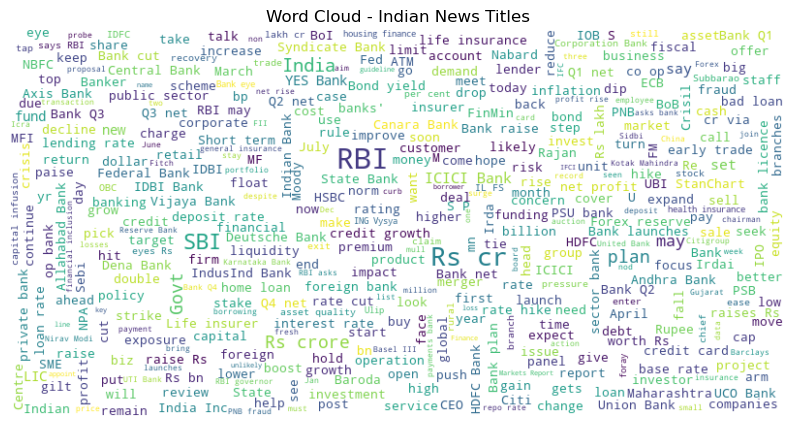

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all the titles into a single string
text = ' '.join(indian_news_df['Title'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=400, max_font_size=30).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Indian News Titles')
plt.show()

In [17]:
import pandas as pd

# Create an empty dataframe
stock_df = pd.DataFrame()

stock_df = indian_news_df
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='%B %d, %Y, %A')

In [18]:
predictions = model.predict(np.array(stock_df['Title']))

# Convert the predictions to class labels
stock_df['Sentiment'] = np.argmax(predictions, axis=1)

1563/1563 [==============================] - 6s 4ms/step


In [19]:
stock_df

,Date,Title,Description,Sentiment
0,2003-02-10,Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums,0
1,2003-02-10,Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits,0
2,2003-02-10,"Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore",2
3,2003-02-11,Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...,0
4,2003-02-11,Lic Mops Up Government Securities As Prices Crash,Lic Mops Up Government Securities As Prices Crash,0
...,...,...,...,...
49995,2020-05-23,DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...,1
49996,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...,1
49997,2020-05-25,"Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...,0
49998,2020-05-26,IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex...",1


In [20]:
sector_dict = {
    'Technology': ['Tech', 'Information Technology', 'IT', 'Software', 'Hardware', 'Digital', 'Innovation'],
    'Finance': ['Financial Services', 'Banking', 'Insurance', 'Investment', 'Capital Markets', 'Fintech', 'Wealth Management'],
    'Healthcare': ['Medical', 'Pharmaceutical', 'Biotech', 'Health', 'Medical Devices', 'Life Sciences', 'Healthtech'],
    'Energy': ['Oil', 'Gas', 'Renewable Energy', 'Utilities', 'Power', 'Clean Energy', 'Sustainable'],
    'Consumer Goods': ['Retail', 'Consumer Products', 'Apparel', 'Food and Beverage', 'Household', 'E-commerce', 'Luxury'],
    'Industrial': ['Manufacturing', 'Engineering', 'Construction', 'Aerospace', 'Defense', 'Machinery', 'Infrastructure'],
    'Telecommunication': ['Telecom', 'Telecom Services', 'Communications', 'Telecommunication Equipment', 'Networks', 'Connectivity', 'Wireless'],
    'Utilities': ['Electric', 'Water', 'Gas Utilities', 'Utility Services', 'Infrastructure', 'Grid', 'Energy Management'],
    'Real Estate': ['Property', 'Real Property', 'Real Estate Investment Trust', 'REIT', 'Residential', 'Commercial', 'Development'],
    'Transportation': ['Logistics', 'Shipping', 'Transport', 'Airlines', 'Railways', 'Supply Chain', 'Freight'],
    'Global': ['dollar', 'oil', 'war', 'pandemic', 'virus', 'russia', 'china', 'International', 'Worldwide', 'Global Events', 'International Business', 'News', 'Globalization', 'Cross-border'],
    'Economy': ['Economic', 'Financial', 'Market', 'Growth', 'Trade', 'Policy', 'Macro', 'RBI'],
    'Company Finance': ['Revenue', 'Profit', 'Loss', 'Earnings', 'Financial Statement', 'Balance Sheet', 'Cash Flow', 'cashflows', 'cashflow', 'inflow', 'inflows', 'outflow', 'outflows', 'Investor Relations']
}

In [26]:
def find_synonymous_names(ticker):
    nifty_large_caps = {
        'TCS': ['Tata Consultancy Services', 'Tata C', 'Tata CS', 'TCS'],
        'RELIANCE': ['Reliance Industries', 'RIL', 'Reliance Ind', 'RELIANCE'],
        'HDFCBANK': ['HDFC Bank Ltd', 'HDFCB', 'HDFC B', 'HDFCBANK'],
        'ADANIPORTS': ['Adani Ports and SEZ', 'Adani Port', 'Adani SEZ', 'ADANIPORTS'],
        'ASIANPAINT': ['Asian Paints Ltd', 'Asian Paint', 'APL', 'ASIANPAINT'],
        'AXISBANK': ['Axis Bank Ltd', 'Axis B', 'Axis', 'AXISBANK'],
        'BAJAJ-AUTO': ['Bajaj Auto Ltd', 'Bajaj A', 'BAL', 'BAJAJ-AUTO'],
        'BAJFINANCE': ['Bajaj Finance Ltd', 'Bajaj F', 'BAF', 'BAJFINANCE'],
        'BAJAJFINSV': ['Bajaj Finserv Ltd', 'Bajaj FS', 'BAFS', 'BAJAJFINSV'],
        'BHARTIARTL': ['Bharti Airtel Ltd', 'Bharti A', 'BAL', 'BHARTIARTL'],
        'BRITANNIA': ['Britannia Industries Ltd', 'Britannia Ind', 'BIL', 'BRITANNIA'],
        'CIPLA': ['Cipla Ltd', 'Cipla', 'CIPL', 'CIPLA'],
        'COALINDIA': ['Coal India Ltd', 'Coal Ind', 'COAL', 'COALINDIA'],
        'DRREDDY': ['Dr. Reddy\'s Laboratories Ltd', 'Dr. Reddy\'s', 'DRL', 'DRREDDY'],
        'EICHERMOT': ['Eicher Motors Ltd', 'Eicher M', 'EICM', 'EICHERMOT'],
        'GRASIM': ['Grasim Industries Ltd', 'Grasim Ind', 'GRAS', 'GRASIM'],
        'HCLTECH': ['HCL Technologies Ltd', 'HCL Tech', 'HCLT', 'HCLTECH'],
        'HDFCLIFE': ['HDFC Life Insurance Company Ltd', 'HDFC Life', 'HDFCLI', 'HDFCLIFE'],
        'HEROMOTOCO': ['Hero MotoCorp Ltd', 'Hero M', 'HEM', 'HEROMOTOCO'],
        'HINDALCO': ['Hindalco Industries Ltd', 'Hindalco Ind', 'HAL', 'HINDALCO'],
        'HINDUNILVR': ['Hindustan Unilever Ltd', 'Hindustan U', 'HUVR', 'HINDUNILVR'],
        'HDFC': ['Housing Development Finance Corporation Ltd', 'HDFC', 'HDFC Corp', 'HDFC'],
        'ICICIBANK': ['ICICI Bank Ltd', 'ICICI B', 'ICICIB', 'ICICIBANK'],
        'IOC': ['Indian Oil Corporation Ltd', 'Indian Oil', 'IOC'],
        'ITC': ['ITC Ltd', 'ITC', 'ITC Ltd', 'ITC'],
        'INDUSINDBK': ['IndusInd Bank Ltd', 'IndusInd B', 'IIB', 'INDUSINDBK'],
        'INFY': ['Infosys Ltd', 'Infosys', 'INFY', 'INFY'],
        'JSWSTEEL': ['JSW Steel Ltd', 'JSW Steel', 'JSTL', 'JSWSTEEL'],
        'KOTAKBANK': ['Kotak Mahindra Bank Ltd', 'Kotak B', 'KMB', 'KOTAKBANK'],
        'LT': ['Larsen & Toubro Ltd', 'L&T', 'LT', 'LT'],
        'M&M': ['Mahindra & Mahindra Ltd', 'Mahindra M', 'M&M', 'M&M'],
        'MARUTI': ['Maruti Suzuki India Ltd', 'Maruti', 'MSIL', 'MARUTI'],
        'NESTLEIND': ['Nestle India Ltd', 'Nestle Ind', 'NEST', 'NESTLEIND'],
        'NTPC': ['NTPC Ltd', 'NTPC', 'NTPC Ltd', 'NTPC'],
        'ONGC': ['Oil and Natural Gas Corporation Ltd', 'ONGC', 'ONGC Corp', 'ONGC'],
        'POWERGRID': ['Power Grid Corporation of India Ltd', 'Power Grid', 'PGCIL', 'POWERGRID'],
        'SBIN': ['State Bank of India (SBI)', 'SBI', 'SBI Ltd', 'SBIN'],
        'SBILIFE': ['SBI Life Insurance Company Ltd', 'SBI Life', 'SBIL', 'SBILIFE'],
        'SHREECEM': ['Shree Cement Ltd', 'Shree C', 'SHCM', 'SHREECEM'],
        'SUNPHARMA': ['Sun Pharmaceutical Industries Ltd', 'Sun Pharma', 'SUNPHARMA', 'SUNPHARMA'],
        'TATAMOTORS': ['Tata Motors Ltd', 'Tata M', 'TTM', 'TATAMOTORS'],
        'TATASTEEL': ['Tata Steel Ltd', 'Tata S', 'TATASTEEL', 'TATASTEEL'],
        'TECHM': ['Tech Mahindra Ltd', 'Tech M', 'TECHM', 'TECHM'],
        'TITAN': ['Titan Company Ltd', 'Titan', 'TITAN', 'TITAN'],
        'ULTRACEMCO': ['UltraTech Cement Ltd', 'UltraTech C', 'ULTRACEMCO', 'ULTRACEMCO'],
        'UBL': ['United Breweries Ltd', 'United B', 'UBL', 'UBL'],
        'UPL': ['UPL Ltd', 'UPL', 'UPL Ltd', 'UPL'],
        'WIPRO': ['Wipro Ltd', 'Wipro', 'WIPRO', 'WIPRO'],
        'ZEEL': ['Zee Entertainment Enterprises Ltd', 'Zee Ent', 'ZEEL', 'ZEEL']
    }

    synonymous_names = nifty_large_caps.get(ticker, [])
    synonymous_names.append(ticker)

    for name in synonymous_names[:]:
        if name.endswith(' Ltd'):
            synonymous_names.append(name.replace(' Ltd', ''))

    return synonymous_names

In [57]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

def predict_stock_prices(tick):
    print('\n \n', tick)
    df = pd.read_csv(('/kaggle/input/nifty50-stock-market-data/' + tick + '.csv'))
    df['Date'] = pd.to_datetime(df['Date'])
    df['Return'] = (df['Close'] / df['Close'].shift(2) - 1) * 100
    df['Last 3-Day Return'] = (df['Close'].shift(1) / df['Close'].shift(4) - 1) * 100
    df['Last 7-Day Return'] = (df['Close'].shift(1) / df['Close'].shift(8) - 1) * 100
    df = df[['Date', 'Return', 'Last 3-Day Return', 'Last 7-Day Return']]
    date_range_start = pd.to_datetime('2003-02-10')
    date_range_end = pd.to_datetime('2020-05-26')
    df = df[(df['Date'] >= date_range_start) & (df['Date'] <= date_range_end)]
    merged_df = pd.merge(df, stock_df, on='Date', how='left')
    merged_df = merged_df.dropna()

    # Reset the index
    merged_df = merged_df.reset_index(drop=True)
    
    # Assuming you have the 'merged_df' dataframe with 'Title' column and the 'sector_dict' dictionary

    # Iterate over the sector_dict
    for sector, synonymous_words in sector_dict.items():
        # Convert synonymous words to lowercase
        synonymous_words_lower = [word.lower() for word in synonymous_words]
        # Create a new column for the sector in merged_df
        merged_df[sector] = merged_df['Description'].apply(lambda x: 1 if any(word.lower() in x.lower() for word in synonymous_words_lower) else 0)

    merged_df['Sentiment'] = merged_df['Sentiment'].replace(2, -1)
    
    merged_df['Symbol Specific News'] = merged_df['Description'].apply(lambda x: 1 if any(word.lower() in x.lower() for word in find_synonymous_names(tick)) else 0)
    
    features = merged_df.drop(['Date', 'Return', 'Title', 'Description'], axis=1)
    target = merged_df['Return']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

    # Scale the features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the neural network model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping callback
    early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    # Evaluate the model
    loss = model.evaluate(X_test_scaled, y_test)
    print("Mean Squared Error on Test Set:", loss)

    # Make predictions
    predictions = model.predict(X_test_scaled)
    # Display the updated merged_df with new columns for each sector
#     print(predictions, y_test)
    def count_opposite_signs(A, B):
        count = 0
        A = np.ravel(A)  # Flatten the 2D array to 1D
        B = B.values.flatten()  # Flatten the 2D array to 1D
        for i in range(len(A)):
            if (A[i] < 0 and B[i] > 0) or (A[i] > 0 and B[i] < 0):
                count += 1
        return count


    opposite_signs_count = count_opposite_signs(np.array(predictions), y_test)
    
    print('Accuracy of the model to predict the direction correctly - ', opposite_signs_count / len(y_test) * 100)
    return

In [58]:
predict_stock_prices('BPCL')


 
 BPCL
Epoch 1/100
794/794 [==============================] - 5s 4ms/step - loss: 13.7063 - val_loss: 12.7191
Epoch 2/100
794/794 [==============================] - 3s 4ms/step - loss: 13.0280 - val_loss: 12.0441
Epoch 3/100
794/794 [==============================] - 3s 4ms/step - loss: 12.5651 - val_loss: 11.8203
Epoch 4/100
794/794 [==============================] - 3s 4ms/step - loss: 12.2822 - val_loss: 11.7430
Epoch 5/100
794/794 [==============================] - 3s 4ms/step - loss: 12.1769 - val_loss: 11.5733
Epoch 6/100
794/794 [==============================] - 3s 4ms/step - loss: 12.1106 - val_loss: 11.6955
Epoch 7/100
794/794 [==============================] - 3s 4ms/step - loss: 12.0286 - val_loss: 11.5100
Epoch 8/100
794/794 [==============================] - 3s 4ms/step - loss: 11.9976 - val_loss: 11.5494
Epoch 9/100
794/794 [==============================] - 3s 4ms/step - loss: 11.9341 - val_loss: 11.6998
Epoch 10/100
794/794 [==============================] - 3s 4ms/s

In [53]:
tickers = ['HDFC', 'ASIANPAINT', 'AXISBANK', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'HDFCBANK', 'INFY', 'HINDALCO', 'IOC']

In [59]:
for tick in tickers:
    predict_stock_prices(tick)


 
 HDFC
Epoch 1/100
794/794 [==============================] - 5s 4ms/step - loss: 15.6944 - val_loss: 12.0006
Epoch 2/100
794/794 [==============================] - 3s 4ms/step - loss: 15.6258 - val_loss: 11.9924
Epoch 3/100
794/794 [==============================] - 3s 4ms/step - loss: 15.3891 - val_loss: 11.8979
Epoch 4/100
794/794 [==============================] - 3s 4ms/step - loss: 14.9493 - val_loss: 11.9656
Epoch 5/100
794/794 [==============================] - 3s 4ms/step - loss: 14.5063 - val_loss: 11.7542
Epoch 6/100
794/794 [==============================] - 3s 4ms/step - loss: 14.4332 - val_loss: 11.7761
Epoch 7/100
794/794 [==============================] - 3s 4ms/step - loss: 14.3429 - val_loss: 11.5714
Epoch 8/100
794/794 [==============================] - 3s 4ms/step - loss: 14.0096 - val_loss: 11.4625
Epoch 9/100
794/794 [==============================] - 3s 4ms/step - loss: 13.9198 - val_loss: 11.4457
Epoch 10/100
794/794 [==============================] - 3s 4ms/s